<a href="https://colab.research.google.com/github/yuribp0107/Curso-CNN-RX/blob/main/Taller_ejemplo_MLP_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
15/15 - 4s - 287ms/step - auc: 0.5505 - loss: 0.6811 - val_auc: 0.6562 - val_loss: 0.6302
Epoch 2/20
15/15 - 0s - 17ms/step - auc: 0.9408 - loss: 0.4529 - val_auc: 0.9241 - val_loss: 0.4533
Epoch 3/20
15/15 - 0s - 11ms/step - auc: 0.9820 - loss: 0.3228 - val_auc: 0.9757 - val_loss: 0.3373
Epoch 4/20
15/15 - 0s - 20ms/step - auc: 0.9887 - loss: 0.2395 - val_auc: 0.9859 - val_loss: 0.2628
Epoch 5/20
15/15 - 0s - 20ms/step - auc: 0.9914 - loss: 0.1860 - val_auc: 0.9901 - val_loss: 0.2146
Epoch 6/20
15/15 - 0s - 19ms/step - auc: 0.9929 - loss: 0.1516 - val_auc: 0.9904 - val_loss: 0.1830
Epoch 7/20
15/15 - 0s - 18ms/step - auc: 0.9938 - loss: 0.1286 - val_auc: 0.9919 - val_loss: 0.1612
Epoch 8/20
15/15 - 0s - 12ms/step - auc: 0.9944 - loss: 0.1124 - val_auc: 0.9934 - val_loss: 0.1459
Epoch 9/20
15/15 - 0s - 8ms/step - auc: 0.9950 - loss: 0.1005 - val_auc: 0.9936 - val_loss: 0.1347
Epoch 10/20
15/15 - 0s - 9ms/step - auc: 0.9953 - loss: 0.0914 - val_auc: 0.9937 - val_loss: 0.1262


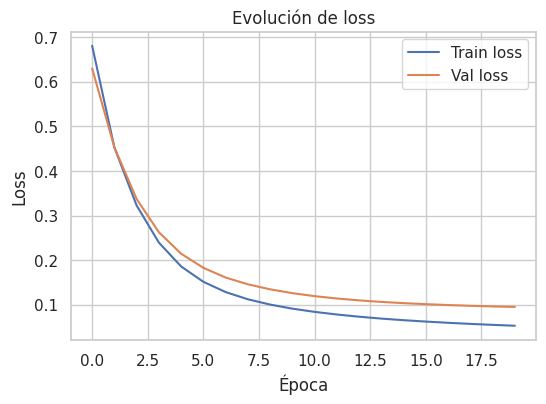

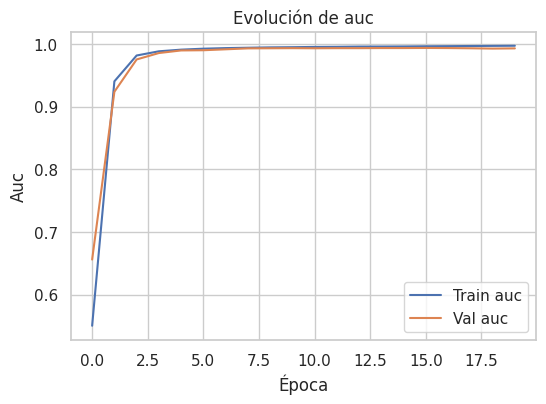


✅  AUC en test: 0.9934


In [1]:
# ------------------------------------------------------------------------------------
# 🔧 1. Importaciones
# ------------------------------------------------------------------------------------
import tensorflow as tf
from tensorflow.keras.metrics import AUC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")    # estética opcional

# Garantizar reproducibilidad — opcional
SEED = 42
tf.random.set_seed(SEED)

# ------------------------------------------------------------------------------------
# 📥 2. Cargar y preparar los datos
# ------------------------------------------------------------------------------------
data = load_breast_cancer()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=SEED, stratify=y
)

# ------------------------------------------------------------------------------------
# 🧠 3. Definir el modelo MLP en Keras
# ------------------------------------------------------------------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[AUC(name='auc')]
)

model.summary()  # Muestra la arquitectura

# ------------------------------------------------------------------------------------
# 🚂 4. Entrenamiento
# ------------------------------------------------------------------------------------
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)

# ------------------------------------------------------------------------------------
# 📊 5. Curvas de aprendizaje (pérdida y AUC)
# ------------------------------------------------------------------------------------
def plot_metric(metric_name):
    plt.figure(figsize=(6,4))
    plt.plot(history.history[metric_name], label=f'Train {metric_name}')
    plt.plot(history.history[f'val_{metric_name}'], label=f'Val {metric_name}')
    plt.xlabel('Época')
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.title(f'Evolución de {metric_name}')
    plt.show()

plot_metric('loss')
plot_metric('auc')

# ------------------------------------------------------------------------------------
# 📝 6. Evaluación final
# ------------------------------------------------------------------------------------
test_loss, test_auc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅  AUC en test: {test_auc:.4f}")
